In [1]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Analysis of Game Sales

In this portfolio task you are provided with sales data for video games released between 1985 and 2016. This includes a regional breakdown of sales and basic product information (genre, platform, etc.). You are also given some critic and user review data from Metacritic in a separate file which you will need to combine with the first dataset. You will need to do some preparation of the data then address a number of analysis questions with plots as well as written answers.

### Description of Fields

* Name - The game's name
* Platform - Platform of the games release
* YearofRelease - Year of the game's release
* Genre - Genre of the game
* Publisher - Publisher of the game
* NA_Sales - Sales in North America (in millions)
* EU_Sales - Sales in Europe (in millions)
* JP_Sales - Sales in Japan (in millions)
* Other_Sales - Sales in the rest of the world (in millions)
* Global_Sales - Total worldwide sales (in millions)
* Critic_score - Aggregate score compiled by Metacritic staff
* Critic_count - The number of critics used in coming up with the critic score
* User_score - Score by Metacritic's subscribers
* User_count - Number of users who gave the user score
* Rating - The [ESRB ratings](https://www.esrb.org/ratings-guide/)

Original dataset credit: [Rush Kirubi](https://www.kaggle.com/rush4ratio), [Gregory Smith](https://www.kaggle.com/gregorut) and [Kendall Gillies](https://www.kaggle.com/kendallgillies).

## Tasks
1. Cleaning and Preparation
    * Load the ratings dataset (stored in 'files\ratings.csv') as a pandas dataframe and merge it with the sales data.
    * Some titles have no year of release recorded and might be difficult to work with, identify these titles and deal with them then fix the type of the column. **Hint**: You can remove them **with justification** or impute a year of release **appropriate to the platform**.
    * Identify and remove any extreme outliers in global sales.
    * (Optional) Discuss the cause of the outlier.
    * (Optional) You can remove any other data that is disruptive or irrelevant to your work **with justification**.
2. Visualization and Analysis:
    * Show the distribution of global game sales by genre. **Hint**: You will need to use some aggregation for this and subsequent tasks.
    * Sales are divided into regions (North America, Europe, Japan and Other), explore the relationships between sales in different regions. Are a game's sales in the Japanese market or the North American market a better predictor of success in Europe?
    * Visualize the relationship between genre and region in terms of total sales. Does the popularity of different genres vary by region? If so, what are the most notable differences?
    * Some outlets have [claimed](https://medium.com/defiant/video-game-reviews-are-broken-af05335f9b57) that recently, critics have have been pressured to give more positive reviews or face reduced access. Plot and compare the average critic scores and user scores by release year since 2000. Do you think this claim is supported?
    


## 1. Read csv data into dataframe

In [2]:
fpath = 'C:/Users/P1331215/Documents/GitHub/portfolio-rishabhgargau/files/'

sales = pd.read_csv(os.path.join("files", fpath + "game_sales_data.csv"))
sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17416 non-null  object 
 1   Platform         17416 non-null  object 
 2   Year_of_Release  17408 non-null  float64
 3   Genre            17416 non-null  object 
 4   Publisher        17415 non-null  object 
 5   NA_Sales         17416 non-null  float64
 6   EU_Sales         17416 non-null  float64
 7   JP_Sales         17416 non-null  float64
 8   Other_Sales      17416 non-null  float64
 9   Global_Sales     17416 non-null  float64
 10  Rating           10252 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


## 2. Data Cleaning and Preparation
### 2.1 Load the ratings dataset and merge it with the sales data.

In [4]:
fpath = 'C:/Users/P1331215/Documents/GitHub/portfolio-rishabhgargau/files/'

ratings = pd.read_csv(os.path.join("files", fpath + "ratings.csv"))
ratings.head()

,Name,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,76.0,51.0,8.0,324.0
1,Mario Kart Wii,82.0,73.0,8.3,712.0
2,Wii Sports Resort,80.0,73.0,8.0,193.0
3,New Super Mario Bros.,89.0,65.0,8.5,433.0
4,Wii Play,58.0,41.0,6.6,129.0


In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8943 entries, 0 to 8942
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          8943 non-null   object 
 1   Critic_Score  8336 non-null   float64
 2   Critic_Count  8336 non-null   float64
 3   User_Score    7798 non-null   float64
 4   User_Count    7798 non-null   float64
dtypes: float64(4), object(1)
memory usage: 349.5+ KB


In [6]:
df_merge = pd.merge(sales, ratings, on ='Name')
df_merge.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,E,76.0,51.0,8.0,324.0
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,E,82.0,73.0,8.3,712.0
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,E,80.0,73.0,8.0,193.0
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,E,89.0,65.0,8.5,433.0
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,E,58.0,41.0,6.6,129.0


In [7]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8943 entries, 0 to 8942
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8943 non-null   object 
 1   Platform         8943 non-null   object 
 2   Year_of_Release  8942 non-null   float64
 3   Genre            8943 non-null   object 
 4   Publisher        8943 non-null   object 
 5   NA_Sales         8943 non-null   float64
 6   EU_Sales         8943 non-null   float64
 7   JP_Sales         8943 non-null   float64
 8   Other_Sales      8943 non-null   float64
 9   Global_Sales     8943 non-null   float64
 10  Rating           8830 non-null   object 
 11  Critic_Score     8336 non-null   float64
 12  Critic_Count     8336 non-null   float64
 13  User_Score       7798 non-null   float64
 14  User_Count       7798 non-null   float64
dtypes: float64(10), object(5)
memory usage: 1.1+ MB


### 2.2 Handle any records where release year is missing and change column dtype

In [8]:
df_merge[df_merge['Year_of_Release'].isnull()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating,Critic_Score,Critic_Count,User_Score,User_Count
8608,Ferrari: The Race Experience,Wii,NaN,Racing,System 3 Arcade Software,0.0,0.01,0.0,0.0,0.02,E,54.0,4.0,NaN,NaN


#### Only 1 single record is missing release year as shown above, lets google it and assign it year 

In [9]:
df_merge.at[df_merge['Year_of_Release'].isnull()]= 2010

#### Change the column data type from float to int

In [10]:
df_merge = df_merge.astype({'Year_of_Release': int})

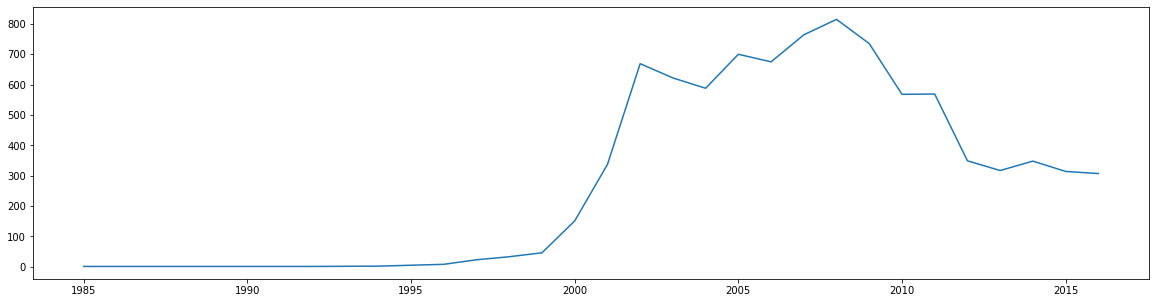

In [11]:
df_merge.Year_of_Release.value_counts().sort_index().plot(figsize=(20,5))

#### Above distribution of titles released by year shows maximum titles released between 2000 and 2013

### 2.3 Identify and remove any extreme outliers in global sales.
    1. Use value_counts function with bins and plot its graph to identify acceptable range of global_sales
    2. Using above method, I shrinked my limit to the values where most of the records belong
    3. The final result of the acceptable limit of global_sales is 0 to 2 (in millions)

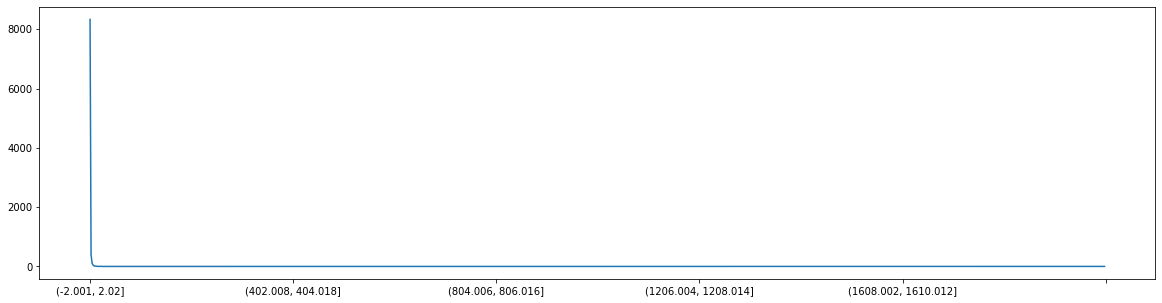

In [12]:
df_merge.Global_Sales.value_counts(bins=1000).sort_index().plot(figsize=(20,5))

#### A per above graph, there are outlier on the higher side of global sales, hidden in dataset

In [13]:
df_merge[df_merge['Global_Sales']>100]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating,Critic_Score,Critic_Count,User_Score,User_Count
8608,2010,2010,2010,2010,2010,2010.0,2010.0,2010.0,2010.0,2010.0,2010,2010.0,2010.0,2010.0,2010.0


#### Shown above, we found an extreme outlier with global_sales as "2010", its a clear data entry issues and needs removal

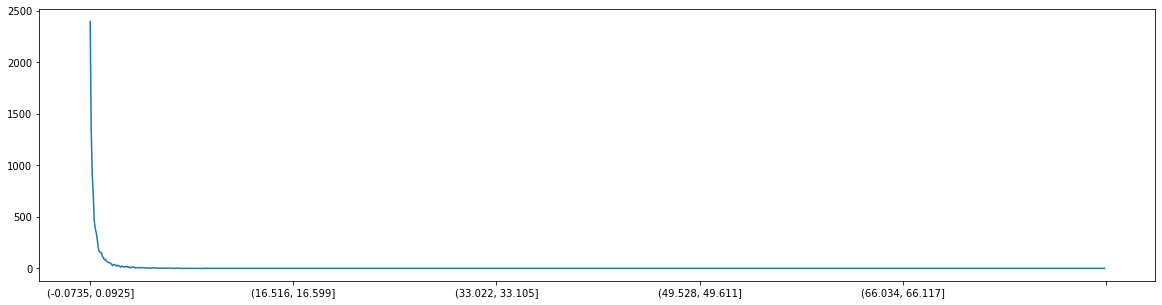

In [14]:
df_merge[df_merge['Global_Sales']<100].Global_Sales.value_counts(bins=1000).sort_index().plot(figsize=(20,5))

#### A per above graph, any title with global_sales above 10 are too less and can be ignored as well

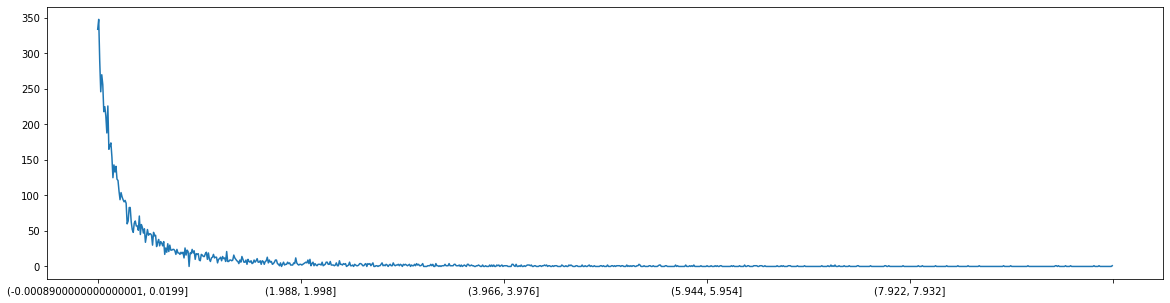

In [15]:
df_merge[df_merge['Global_Sales']<10].Global_Sales.value_counts(bins=1000).sort_index().plot(figsize=(20,5))

#### A per above graph, any title with global_sales above 2 are too less and can be ignored as well

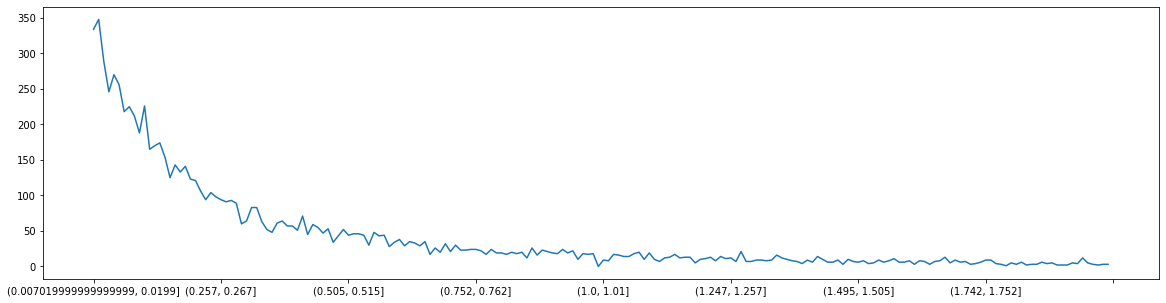

In [16]:
df_merge[df_merge['Global_Sales']<2].Global_Sales.value_counts(bins=200).sort_index().plot(figsize=(20,5))

#### Above graph shows our acceptable range of global_sales, i.e  <font size="3">[0 to 2 million]()</font>

In [17]:
df = df_merge[df_merge['Global_Sales']<2]

#### Above is our new clean dataframe "df" after removing outliers

## 3. Data Visualization and Analysis
### 3.1 Show the distribution of global game sales by genre. **Hint**: You will need to use some aggregation for this and subsequent tasks.

In [18]:
df.groupby(['Genre'])['Global_Sales'].sum().sort_values()

Genre
Puzzle           54.47
Strategy         69.93
Adventure        82.54
Simulation      141.15
Fighting        176.45
Platform        197.06
Misc            203.38
Racing          262.66
Role-Playing    268.59
Shooter         365.49
Sports          521.03
Action          743.17
Name: Global_Sales, dtype: float64

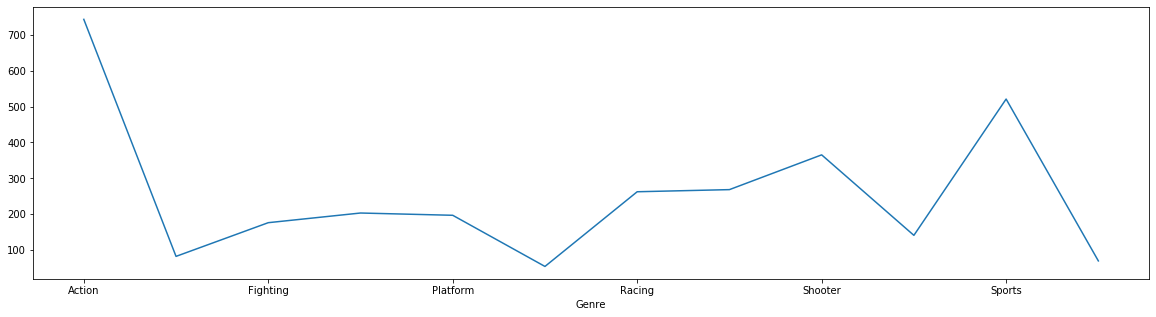

In [19]:
df.groupby(['Genre'])['Global_Sales'].sum().plot(figsize=(20,5))

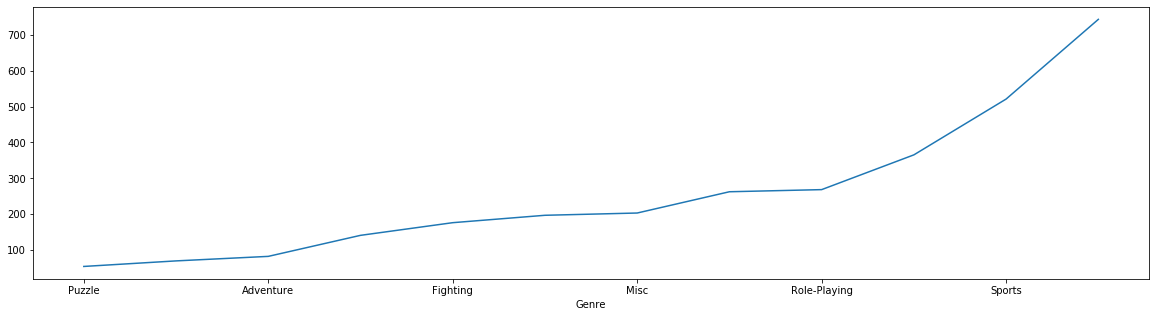

In [20]:
df.groupby(['Genre'])['Global_Sales'].sum().sort_values().plot(figsize=(20,5))

#### Above groupby result and the 2 graphs show :-
    1. Action games have the highest global_sales followed by Sport games
    2. Puzzle games have the lowest global_sales followed by Strategy games

### 3.2 Sales are divided into regions (North America, Europe, Japan and Other), explore the relationships between sales in different regions. Are a game's sales in the Japanese market or the North American market a better predictor of success in Europe?

In [21]:
df['NA_JP_Sales'] = df['NA_Sales'] + df['JP_Sales']

C:\Users\P1331215\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df['NA_JP_Sales'] = df['NA_Sales'] + df['JP_Sales']

C:\Users\P1331215\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


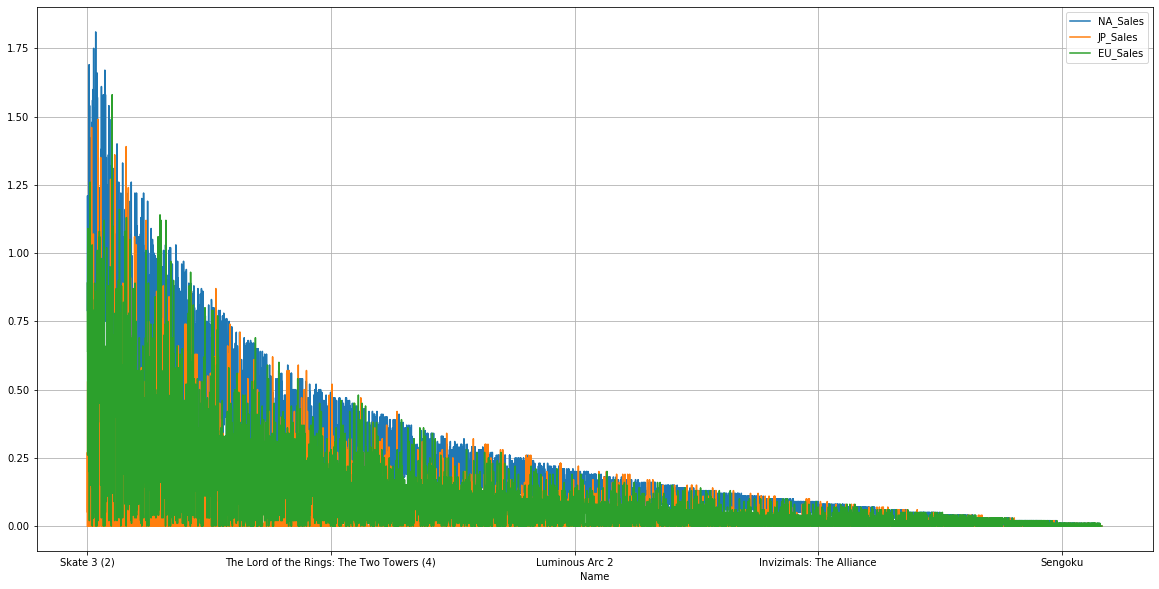

In [23]:
df.plot(x='Name', y=['NA_Sales', 'JP_Sales', 'EU_Sales'], figsize=(20,10), grid=True)

In [24]:
df[['NA_JP_Sales', 'NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales', 'Global_Sales']].corr() 

,NA_JP_Sales,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Global_Sales
NA_JP_Sales,1.000000,0.936232,0.426072,0.473730,0.484804,0.904155
NA_Sales,0.936232,1.000000,0.081011,0.494660,0.506242,0.874562
JP_Sales,0.426072,0.081011,1.000000,0.070178,0.071769,0.312981
EU_Sales,0.473730,0.494660,0.070178,1.000000,0.609456,0.789624
Other_Sales,0.484804,0.506242,0.071769,0.609456,1.000000,0.705283
Global_Sales,0.904155,0.874562,0.312981,0.789624,0.705283,1.000000


#### Above graph and corr data shows :-
    1. Global sales is driven by NA sales
    2. Sales in NA and Japan do not seem to have any relation
    3. Sales in EU is driven by NA and not Japan

### 3.3 Visualize the relationship between genre and region in terms of total sales. Does the popularity of different genres vary by region? If so, what are the most notable differences?

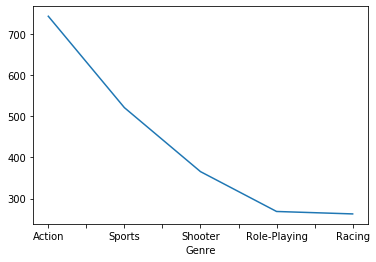

In [25]:
df.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending=False).head(5).plot()

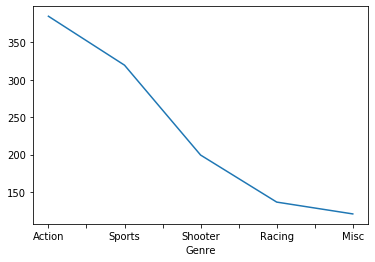

In [26]:
df.groupby(['Genre'])['NA_Sales'].sum().sort_values(ascending=False).head(5).plot()

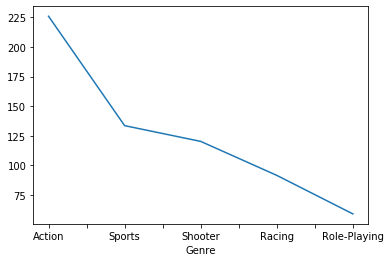

In [27]:
df.groupby(['Genre'])['EU_Sales'].sum().sort_values(ascending=False).head(5).plot()

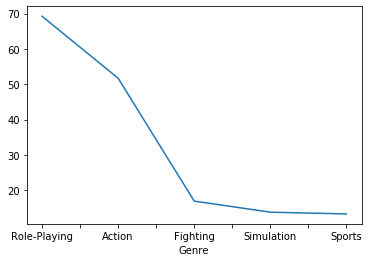

In [28]:
df.groupby(['Genre'])['JP_Sales'].sum().sort_values(ascending=False).head(5).plot()

#### Above data shows :-
    1. Globally, top selling games are Action / Sports / Shooter 
    2. This global trend is due to NA trend where top selling games are Action / Sports / Shooter as well
    3. We see the same above trend in EU region as well.
    4. However, in Japan, top selling games are Role-Play / Action / Fighting
   
#### Above insights show a notable difference that Japan market is very different from the western world market

### 3.4 Some outlets have [claimed](https://medium.com/defiant/video-game-reviews-are-broken-af05335f9b57) that recently, critics have have been pressured to give more positive reviews or face reduced access. Plot and compare the average critic scores and user scores by release year since 2000. Do you think this claim is supported?

In [29]:
df[['Critic_Score', 'User_Score']].corr() 

,Critic_Score,User_Score
Critic_Score,1.000000,0.590881
User_Score,0.590881,1.000000


#### Above data shows no strong correlation between Critic_Score and User_Score

In [30]:
df[df['Year_of_Release']>=2000].groupby(['Year_of_Release'])['Critic_Score', 'User_Score'].mean().describe()

C:\Users\P1331215\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Critic_Score,User_Score
count,17.000000,17.000000
mean,68.452709,7.050575
std,2.281749,0.446362
min,64.757925,6.440569
25%,66.263502,6.659857
50%,68.510949,6.907006
75%,69.798387,7.497436
max,72.011858,7.811485


C:\Users\P1331215\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


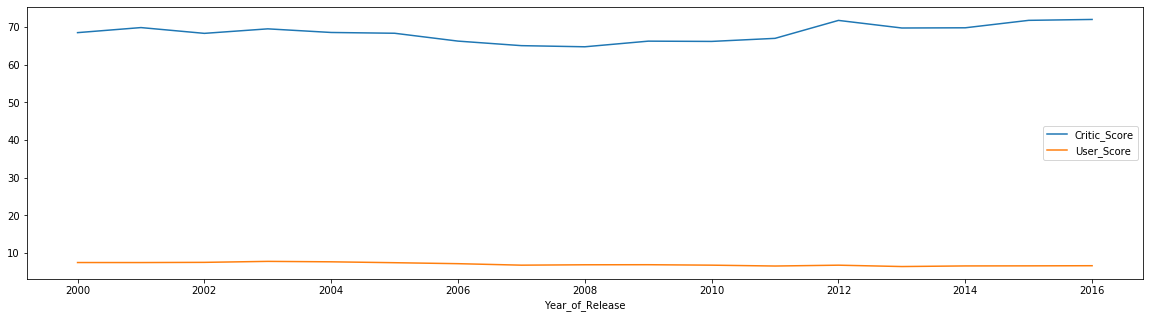

In [31]:
df[df['Year_of_Release']>=2000].groupby(['Year_of_Release'])['Critic_Score', 'User_Score'].mean().plot(figsize=(20,5))

#### Above data shows Critic_Score is on a scale of 1-100 while User_Score is on different scale of 1-10
#### Lets first bring them to same scales for a better comparision

In [32]:
df['Critic_Score_new'] = df['Critic_Score'] / 10

C:\Users\P1331215\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
df[df['Year_of_Release']>=2000].groupby(['Year_of_Release'])['Critic_Score_new', 'User_Score'].mean().describe()

C:\Users\P1331215\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Critic_Score_new,User_Score
count,17.000000,17.000000
mean,6.845271,7.050575
std,0.228175,0.446362
min,6.475793,6.440569
25%,6.626350,6.659857
50%,6.851095,6.907006
75%,6.979839,7.497436
max,7.201186,7.811485


C:\Users\P1331215\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


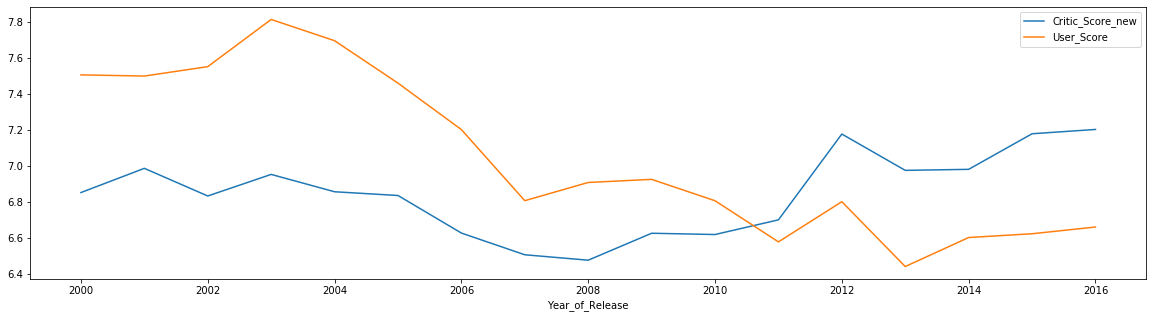

In [34]:
df[df['Year_of_Release']>=2000].groupby(['Year_of_Release'])['Critic_Score_new', 'User_Score'].mean().plot(figsize=(20,5))

#### Above data shows that our hypothesis may not be wrong after all :-
1. Before 2011, critic scores are lower than user scores, which is an ideal scenario
2. However, after 2011, something changed that trend and critic scores are way higher than user scores
3. This might be due to couple of factors including:
    1. Advent of a new cohort of paid critics on new digital platforms like youtube, facebook, twitch etc
    2. Corporates investment into product affiliation programs making critics to published biased scores.

In [35]:
# your work here

## Challenge

Assume that the year is 2016. A publisher is trying to enter the Japanese market and have planned to release 2 products:
* Game 1 - in a popular, established section of the market.
* Game 2 - in an emerging space that has been historically underserved.

Make suggestions for each product in terms of platform, genre and audience/rating based on the data. Support your suggestion with plots, summary statistics or notable examples, or refer to your previous analysis.


### 4.1 Analysis to find popular and established section of the market for Game 1 :-
    1. Limit our dataset to only year 2015 to 2016
    2. Find highest selling Platforms in this new dataset in Japan
    3. Find highest selling Genre in this new dataset in Japan
    4. Verify the results in point 2/3 by finding highest selling combo of "Platform + Genre" in Japan
    5. Check the overall user scores for the final resultan combo of "Platform + Genre"

##### 4.1.1 Create new dataframe for year 2015 to 2016 only

In [36]:
new_df = df[df['Year_of_Release'].astype(float).isin([2015, 2016])]

##### 4.1.2 Find highest selling Platform in Japan

In [37]:
new_df.groupby(['Platform'])['JP_Sales'].sum().sort_values(ascending=False)

Platform
PS4     4.27
3DS     3.68
PSV     2.63
PS3     1.69
WiiU    1.37
XOne    0.13
X360    0.00
PC      0.00
Name: JP_Sales, dtype: float64

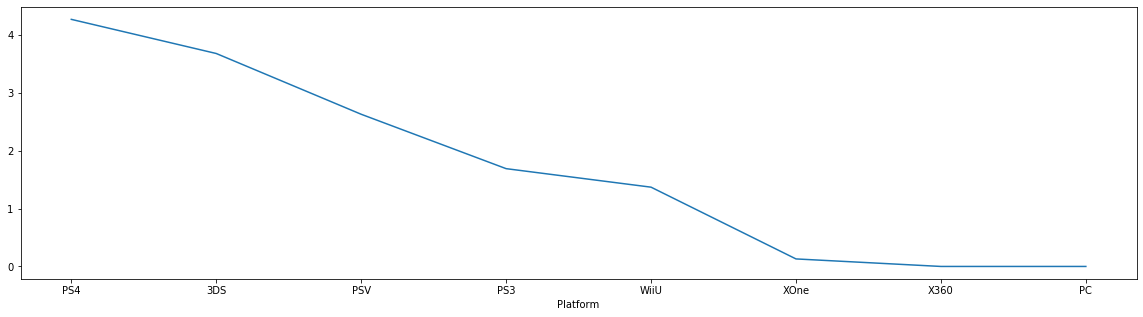

In [38]:
new_df.groupby(['Platform'])['JP_Sales'].sum().sort_values(ascending=False).plot(figsize=(20,5))

#### Above data shows, highest selling platforms are PS4 and Nintendo-DS (3DS)

##### 4.1.3 Find highest selling Genre in Japan

In [39]:
new_df.groupby(['Genre'])['JP_Sales'].sum().sort_values(ascending=False)

Genre
Role-Playing    5.19
Action          4.01
Fighting        1.22
Misc            0.87
Sports          0.80
Shooter         0.53
Platform        0.38
Adventure       0.31
Racing          0.18
Simulation      0.17
Puzzle          0.08
Strategy        0.03
Name: JP_Sales, dtype: float64

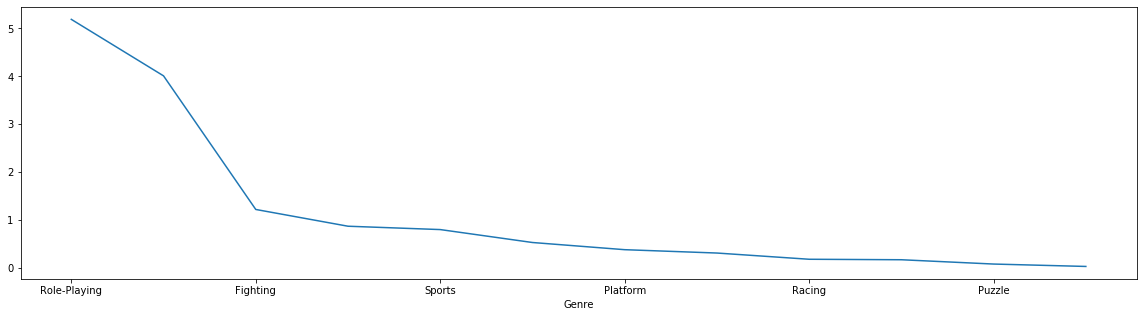

In [40]:
new_df.groupby(['Genre'])['JP_Sales'].sum().sort_values(ascending=False).plot(figsize=(20,5))

#### Above data shows, highest selling genres are Role-Playing and Action games

##### 4.1.4 Verify above identified market section by checking highest selling combo of "Platform + Genre" in Japan

In [41]:
new_df.groupby(['Platform', 'Genre'])['JP_Sales'].sum().sort_values(ascending=False).head(20)

Platform  Genre       
3DS       Role-Playing    2.02
PS4       Action          1.28
PSV       Role-Playing    1.28
PS4       Role-Playing    1.22
3DS       Action          0.98
PSV       Action          0.89
PS3       Action          0.66
PS4       Fighting        0.61
PS3       Role-Playing    0.45
PS4       Sports          0.37
          Shooter         0.34
WiiU      Misc            0.34
PS3       Sports          0.29
PSV       Misc            0.26
WiiU      Platform        0.25
3DS       Misc            0.21
WiiU      Role-Playing    0.21
PS3       Fighting        0.18
WiiU      Fighting        0.18
          Action          0.16
Name: JP_Sales, dtype: float64

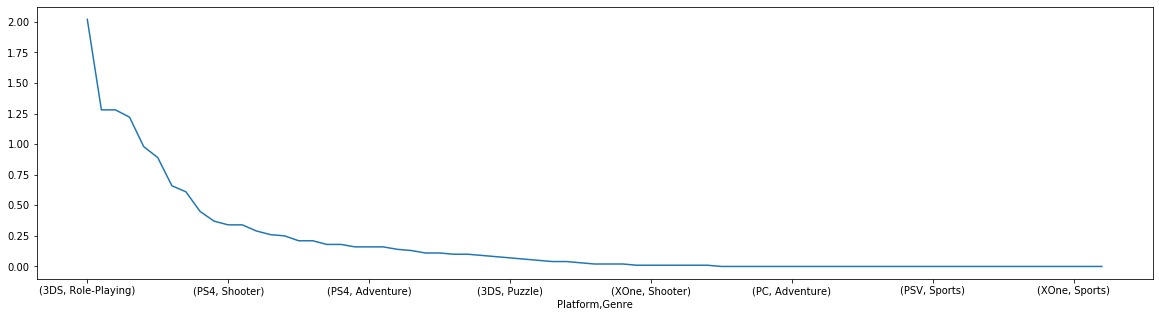

In [42]:
new_df.groupby(['Platform', 'Genre'])['JP_Sales'].sum().sort_values(ascending=False).plot(figsize=(20,5))

#### Above data shows, highest selling combo of "Platform + Genre" in Japan are 
    * Role-Playing and Action games on PS4 and Nintendo-DS platforms

##### 4.1.5 Verify above results by checking existing examples of already published titles

In [43]:
new_df.groupby(['Name'])['JP_Sales'].sum().sort_values(ascending=False).head(20)

Name
Dragon Quest VIII: Journey of the Cursed King (2)    0.87
Kirby: Planet Robobot                                0.50
Tales of Zestiria                                    0.42
God Eater 2: Rage Burst                              0.37
Dark Souls III                                       0.34
Pokemon Super Mystery Dungeon                        0.34
Mario Party 10                                       0.24
Metal Gear Solid V: The Phantom Pain (3)             0.23
Sword Art Online: Lost Song                          0.23
Tales of Berseria                                    0.23
Dragon Ball: Fusions                                 0.20
God Eater Resurrection                               0.19
Bravely Second: End Layer                            0.19
One Piece: Pirate Warriors 3 (2)                     0.19
The Legend of Zelda: Tri Force Heroes                0.18
Pokken Tournament                                    0.18
Mobile Suit Gundam: Extreme VS Force                 0.17
Digimon S

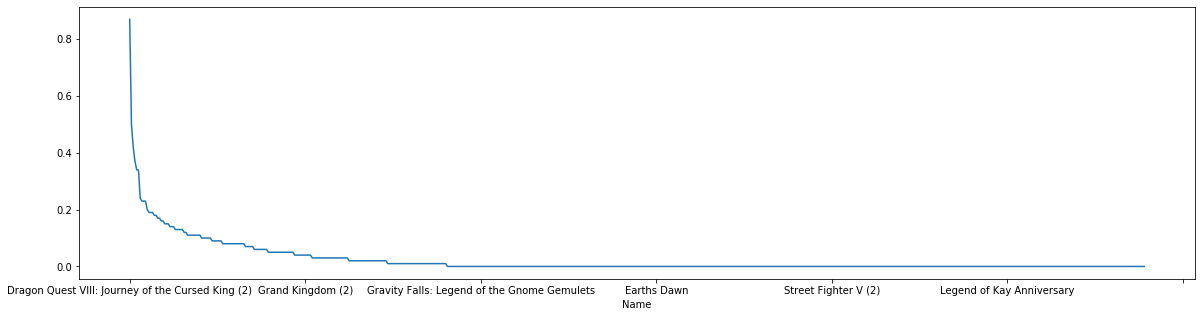

In [44]:
new_df.groupby(['Name'])['JP_Sales'].sum().sort_values(ascending=False).plot(figsize=(20,5))

In [45]:
new_df[new_df['Name'].isin(['Dragon Quest VIII: Journey of the Cursed King (2)', 'Kirby: Planet Robobot', 'Tales of Zestiria'])]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating,Critic_Score,Critic_Count,User_Score,User_Count,NA_JP_Sales,Critic_Score_new
1390,Kirby: Planet Robobot,3DS,2016,Action,Nintendo,0.30,0.18,0.50,0.05,1.03,E,81.0,71.0,8.7,92.0,0.80,8.1
1668,Dragon Quest VIII: Journey of the Cursed King (2),3DS,2015,Role-Playing,Square Enix,0.00,0.00,0.87,0.00,0.87,T,86.0,32.0,9.6,26.0,0.87,8.6
2420,Tales of Zestiria,PS3,2015,Role-Playing,Namco Bandai Games,0.06,0.07,0.42,0.02,0.57,T,NaN,NaN,8.0,47.0,0.48,NaN


#### Above data of top 3 selling games supports our hypothesis for the combo of  the following selection for market entry
    * Role-Playing and Action games on PS4 and Nintendo-DS platforms

### 4.2 Analysis to find emerging underserved space of the market for Game 2 :-
    1. Limit our dataset to 10 years before 2016 i.e. 2005 to 2016 for Japan
    2. Find genre wise - "sales per title ratio" to figure out any underserved genres having low titles but high sales
    3. Verify the above results by plotting yearly sales for the selected genre in Japan 

##### 4.2.1 Create new dataframe for year 2005 to 2016 only

In [46]:
game2 = df[(df['Year_of_Release'].astype(float) <= 2016) & (df['Year_of_Release'].astype(float) > 2005)]

##### 4.2.2 Create new dataframe containing genre by total title count pubished

In [47]:
# perform groupby to get the series containing genre vs title_count 
series_title_count = game2.groupby(['Genre'])['Name'].count()
print(type(series_title_count))

# convert above series into dictionary
dict_title_count = {'genre':series_title_count.index,
                    'title_count':series_title_count.values}
print(type(dict_title_count))

# convert above dictionary into dataframe
df_title_count = pd.DataFrame(dict_title_count)
print(type(df_title_count))
df_title_count

<class 'pandas.core.series.Series'>
<class 'dict'>
<class 'pandas.core.frame.DataFrame'>


,genre,title_count
0,Action,1414
1,Adventure,262
2,Fighting,252
3,Misc,364
4,Platform,232
5,Puzzle,160
6,Racing,376
7,Role-Playing,504
8,Shooter,552
9,Simulation,259


##### 4.2.3 Create new dataframe containing genre by total Japan sales

In [48]:
# perform groupby to get the series containing genre vs sum of sales
series_jp_sales = game2.groupby(['Genre'])['JP_Sales'].sum()
print(type(series_jp_sales))

# convert above series into dictionary
dict_jp_sales = {'genre':series_jp_sales.index,
                    'jp_sales':series_jp_sales.values}
print(type(dict_jp_sales))

# convert above dictionary into dataframe
df_jp_sales = pd.DataFrame(dict_jp_sales)
print(type(df_jp_sales))
df_jp_sales

<class 'pandas.core.series.Series'>
<class 'dict'>
<class 'pandas.core.frame.DataFrame'>


,genre,jp_sales
0,Action,36.84
1,Adventure,5.14
2,Fighting,9.92
3,Misc,4.87
4,Platform,6.20
5,Puzzle,2.74
6,Racing,1.89
7,Role-Playing,49.56
8,Shooter,6.51
9,Simulation,6.14


##### 4.2.4 Merge above 2 dataframes and find "sales_per_titles" ratio for every genre

In [49]:
# merge above 2 dataframes into single dataframe
game2_merge = pd.merge(df_title_count, df_jp_sales, on ='genre')
game2_merge

,genre,title_count,jp_sales
0,Action,1414,36.84
1,Adventure,262,5.14
2,Fighting,252,9.92
3,Misc,364,4.87
4,Platform,232,6.20
5,Puzzle,160,2.74
6,Racing,376,1.89
7,Role-Playing,504,49.56
8,Shooter,552,6.51
9,Simulation,259,6.14


##### 4.2.5 Find "sales_per_titles" ratio for every genre

In [50]:
# calculate sales per title ratio for all genres
game2_merge['sales_per_titles'] = game2_merge['jp_sales'] / game2_merge['title_count']

##### 4.2.6 Find any underserved genres with high "sales_per_titles"

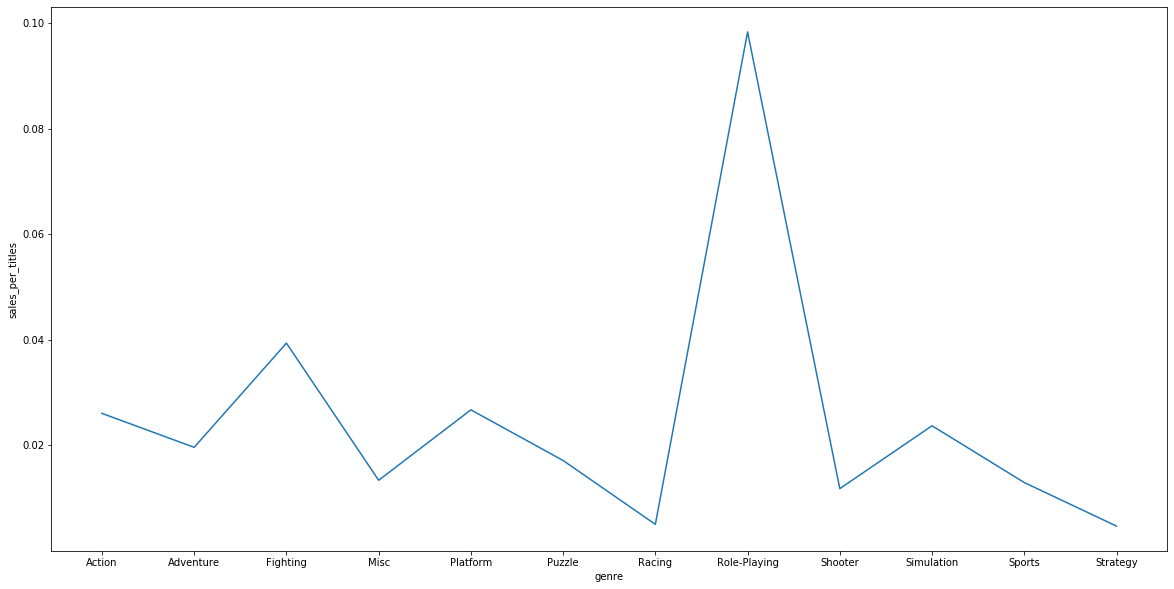

In [51]:
plt.figure(figsize=(20,10))
sns.lineplot(x='genre', y='sales_per_titles', data=game2_merge)

#### As per above graph, Fighting, Simulation and Platform seems to be underserved genres since they are very high "sales_per_title" ratio compared to others. 
    * Note: We ignored "Role-Playing" as it is already the top selling genre in Japan

##### 4.2.7 Plot the line graphs for the underserved genre found above to see any upwards trend in last few years

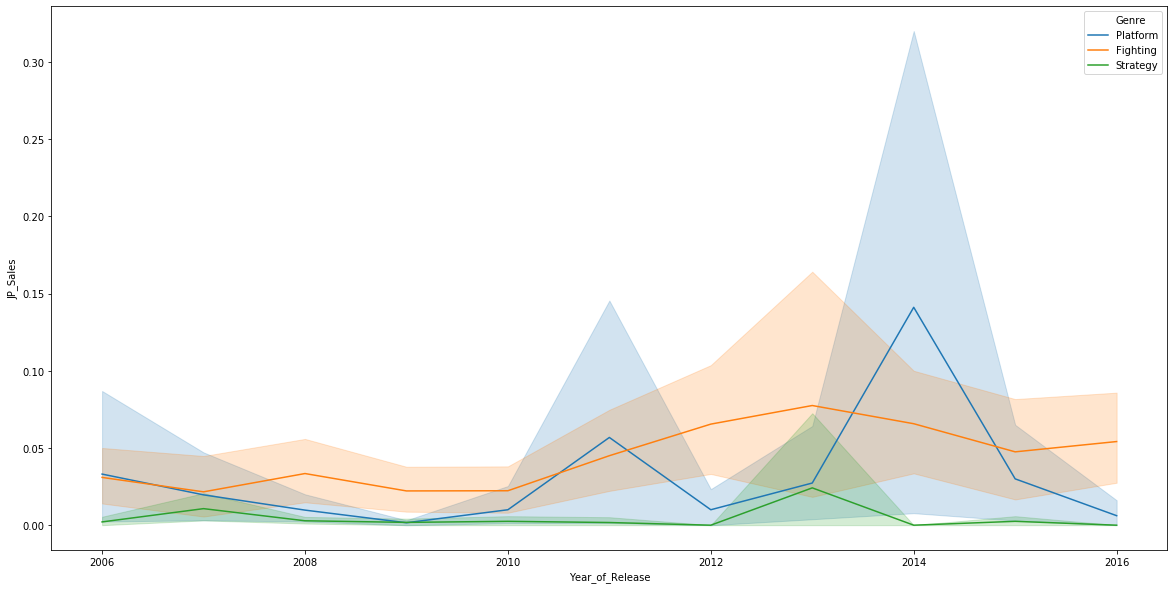

In [52]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Year_of_Release', y='JP_Sales', hue='Genre', data=game2[game2['Genre'].isin(['Strategy', 'Fighting', 'Platform'])])

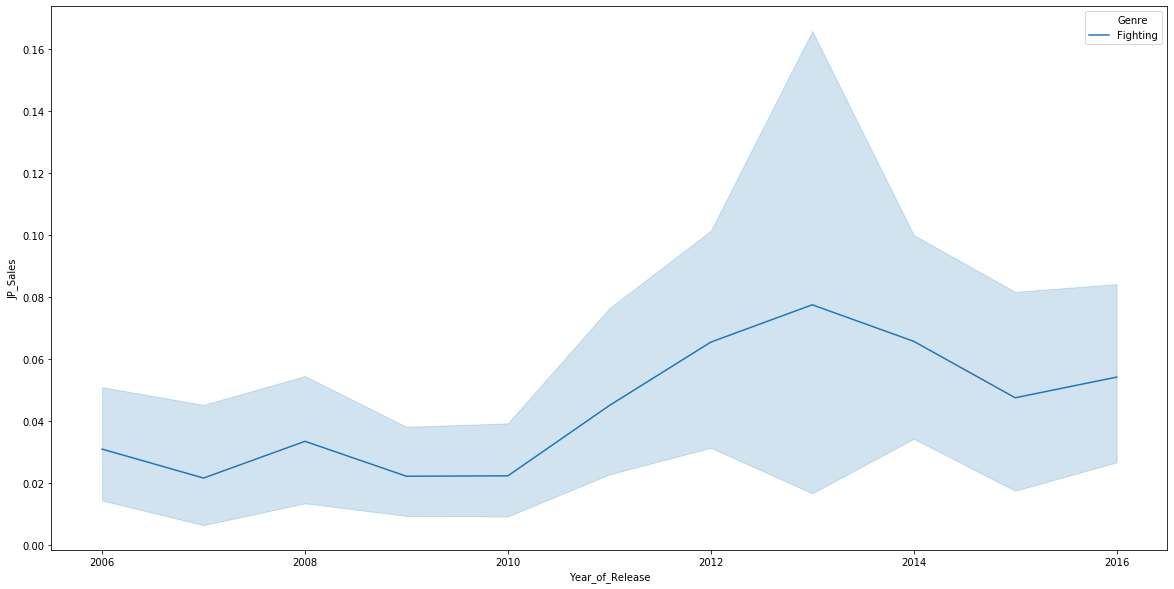

In [53]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Year_of_Release', y='JP_Sales', hue='Genre', data=game2[game2['Genre'].isin(['Fighting'])])

#### Above graph clearly illustrates :- <font size="3">[Fighting]()</font> games have a upwards trend compared to other 2 underserved genres, therefore, we conclude that <font size="3">[Fighting]()</font> games are an ideal candidate for creating our Game 2